# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

In this portfolio project, I analyzed a dataset to build predictive models that offer valuable insights for the Human Resources (HR) department of a large consulting firm. The goal was to predict employee turnover and identify the key factors contributing to employee retention or attrition.

This project showcases my ability to work with real-world data, apply machine learning techniques, and interpret results in a way that can influence decision-making processes within an organization. The deliverables include model evaluation, visualizations to support key findings, and ethical considerations that ensure the proper use of data. This work highlights my data science skills and demonstrates my ability to communicate complex analysis clearly, both in written and visual formats.

By completing this project, I gained hands-on experience with predictive modeling and learned how to effectively present data-driven recommendations to stakeholders.


# **PACE stages**


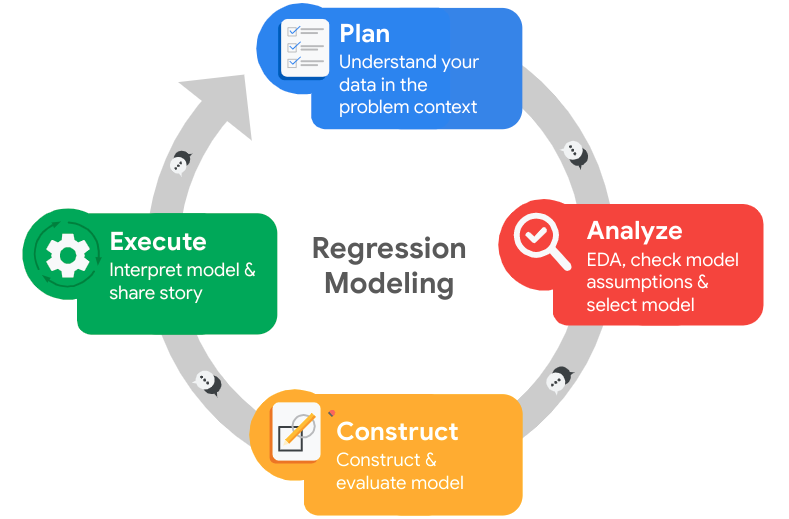

## **Pace: Plan**



### Understand the business scenario and problem

In this project, I worked with a dataset provided by the HR department at Salifort Motors to analyze employee satisfaction and predict factors that contribute to employee turnover. The company was facing challenges with understanding the reasons behind employee attrition and asked for data-driven recommendations to address this issue.

The objective was to build a predictive model that could determine which employees are likely to leave the company. By identifying key factors that influence employee turnover, the company can take proactive steps to improve retention and reduce the costs associated with hiring and training new staff. The analysis and model were aimed at providing actionable insights to the HR team for better decision-making in employee retention strategies.

### Familiarize yourself with the HR dataset

In this project, the dataset used contains 15,000 rows and 10 columns, each representing different variables related to employee performance, satisfaction, and retention. Below is a summary of the dataset's key features:


Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)


This data serves as the foundation for analyzing factors influencing employee turnover and building a predictive model to determine the likelihood of employees leaving the company.

**Note:** For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).


## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages
# for data manipulation
import pandas as pd
import numpy as np

#for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# For data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# For saving models
import pickle


# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

### Load dataset

In this project, I used the `Pandas` library to load a dataset named **`HR_capstone_dataset.csv`.** The dataset is preloaded, so there's no need for you to download the .csv file or provide additional code to access it. You can proceed with the project by following the instructions and analyzing the data to gain insights on employee retention.


In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df0.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

In this project, the first step is to understand the variables within the dataset, which include employee satisfaction, last evaluation score, number of projects, work accident history, and more. Once the variables are understood, the focus shifts to cleaning the dataset, addressing issues such as missing data, redundant columns, and outliers to ensure the dataset is ready for analysis and modeling.



### Gather basic information about the data

In [3]:
# Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
df0.describe()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Data Cleaning: Renaming Columns


As part of the data cleaning process, the dataset's column names are standardized to follow a consistent naming convention, specifically snake_case. This includes correcting any misspelled column names and making them more concise where necessary, ensuring that the dataset is well-structured and easy to work with for analysis.

In [5]:
# Display all column names
df0.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
df0 = df0.rename(columns = {'average_montly_hours': 'average_monthly_hours',
                  'time_spend_company':'tenure',
                  'Work_accident' : 'work_accident',
                  'Department': 'department'
                  })


# Display all column names after the update
df0.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

One of the key steps in data cleaning is to check for any missing values in the dataset. Identifying and addressing missing data ensures the integrity of the dataset, preventing potential issues during analysis and modeling.

In [7]:
# Check for missing values
df0.isna().sum()


satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

There are no missing values in the data.

### Check duplicates

A crucial data cleaning step is checking for duplicate entries. Duplicates can skew analysis and modeling results, so it's important to identify and remove them to ensure the dataset is accurate and reliable.

In [8]:
# Check for duplicates
df0.duplicated().sum()

np.int64(3008)

There are 3,008 duplicated rows. That is 20% of the data.

In [9]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In the dataset, the first five occurrences of duplicated rows are shown. Given the nature of the data, it is highly unlikely that these duplicate entries represent legitimate observations. Since the dataset contains several continuous variables across multiple columns, the probability of two employees providing identical responses across all attributes is extremely low. Therefore, these duplicates can be safely removed to ensure the integrity of the data.

In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df1 = df0.drop_duplicates(keep= 'first')


# Display first few rows of new dataframe as needed
df1.head()


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Outliers can significantly impact the performance of predictive models, so it's important to identify and handle them appropriately.

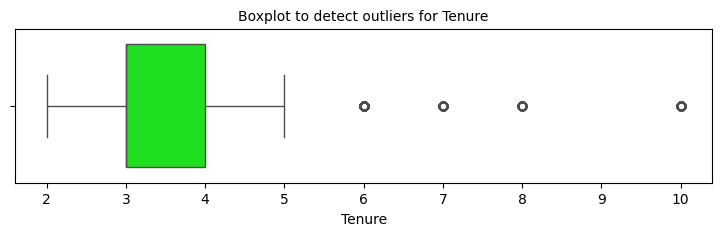

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers

plt.figure(figsize = (9,2))
plt.title('Boxplot to detect outliers for Tenure', fontsize = 10)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Tenure')
sns.boxplot(x = df1['tenure'], color= (0, 1, 0))
plt.show()


In [12]:
# Determine the number of rows containing outliers

#First determine the 25th and 75th percentile value in tenure
percentile25 = df1['tenure'].quantile(0.25)
percentile75 = df1['tenure'].quantile(0.75)

#Calculate the interquartile range in tenure
iqr = percentile75 - percentile25


#Define the upper and lower limits for non-outlier values in tenure
upper_limit = percentile75 + 1.5*iqr
lower_limit = percentile25 - 1.5*iqr

#identify the outliers in `tenure`
outliers = df1[(df1['tenure'] > upper_limit) | (df1['tenure'] < lower_limit)]

print('The lower limit of the distribution was identified as {ll}'.format(ll = lower_limit))
print('The upper limit of the distribution was identified as {ul}'.format(ul = upper_limit))
print('The number of rows containing outliers in tenure was {o}'.format(o = len(outliers)))

The lower limit of the distribution was identified as 1.5
The upper limit of the distribution was identified as 5.5
The number of rows containing outliers in tenure was 824


Different types of models respond differently to outliers. Some models, such as linear regression, can be highly sensitive to extreme values, while others, like tree-based models, may be more robust. When building a predictive model, it is important to evaluate whether removing or transforming outliers will benefit the model's performance. 

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



[Double-click to enter your responses here.]

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [13]:
# Get numbers of people who left vs. stayed
print(df1['left'].value_counts(normalize= False))

# Get percentages of people who left vs. stayed
print('\n', df1['left'].value_counts(normalize= True))

left
0    10000
1     1991
Name: count, dtype: int64

 left
0    0.833959
1    0.166041
Name: proportion, dtype: float64


### Data visualizations

In this step, I explore the variables in the dataset and create visualizations to understand the relationships between them. This helps uncover patterns and insights that can guide the modeling process.

In [14]:
# Create the 3D scatter plot with Plotly
fig = px.scatter_3d(df1, 
                    y='average_monthly_hours', 
                    z='satisfaction_level', 
                    x='last_evaluation', 
                    color='left', 
                    color_continuous_scale='Viridis',  # Use a valid color scale
                    labels={'left': 'Left (1 = Left, 0 = Stayed)'},
                    title='Interactive 3D Plot of Average Monthly Hours, Satisfaction Level, and Last Evaluation')

# Adjust the size of the points
fig.update_traces(marker=dict(size=3))  # Decrease the size of the points

# Adjust the figure size (frame size)
fig.update_layout(
    width=1000,  # Width of the chart
    height=800   # Height of the chart
)

# Show the plot
fig.show()


#### Analysis of Employee Departure Based on a Three-Dimensional Scatterplot

The three-dimensional scatterplot, which includes variables such as **average monthly hours**, **satisfaction level**, and **last evaluation**, reveals three distinct groups of workers who left their jobs. Here's an analysis of these groups:

---

**Group 1:**
- **Satisfaction Level**: 0.3 - 0.5
- **Average Monthly Hours**: 125 - 160
- **Last Evaluation**: 0.42 - 0.6

*Key Insights:*
- **Moderate Workload with Lower Satisfaction**: Workers in this group worked an average number of hours (125-160 hours/month or ~29-37 hours/week). This suggests a balanced workload, yet their relatively low satisfaction levels may stem from factors such as lack of recognition, limited career growth, or poor interpersonal relationships at work. 
- **Stagnant Career Growth**: The moderate evaluation scores reflect that these employees were meeting expectations but perhaps not excelling, which could contribute to feelings of being undervalued or stagnant in their roles. The lack of promotions or challenging tasks might have led to dissatisfaction, despite maintaining a typical workload.
- **It is likely that this group mainly consists of workers who have been laid off.**
---

**Group 2:**
- **Satisfaction Level**: 0.7 - 0.9
- **Average Monthly Hours**: 220 - 275
- **Last Evaluation**: 0.8 - 1.0

*Key Insights:*
- **High Workload, High Satisfaction**: This group worked longer hours (220-275 hours/month or ~50-63 hours/week), which suggests a more demanding role. Despite the heavier workload, these employees reported high satisfaction, possibly due to strong motivation, recognition for their contributions, and career advancement opportunities.
- **Motivated and Career-Focused**: Their positive performance evaluations align with their high satisfaction levels, which could reflect the sense of reward they received from their achievements. The motivation to succeed likely fueled their commitment to longer hours and led to high satisfaction and successful evaluations.

---

**Group 3:**
- **Satisfaction Level**: 0.09 - 0.11
- **Average Monthly Hours**: 243 - 310
- **Last Evaluation**: 0.77 - 0.97

*Key Insights:*
- **Extreme Workload with Low Satisfaction**: Employees in this group worked an extraordinarily high number of hours (243-310 hours/month or ~56-72 hours/week), which could have contributed to burnout or dissatisfaction. Despite the extensive workload, their satisfaction levels were extremely low, likely indicating an overwhelming, stressful, or toxic work environment.
- **Burnout and Exhaustion**: The combination of excessive work hours and low satisfaction suggests that these employees might have been experiencing burnout. Despite receiving relatively high performance evaluations, the overwhelming demands of the job likely made it unsustainable, leading them to seek opportunities elsewhere.
- **It is likely that this group consists mainly of workers who have resigned from their jobs.**

---

### Summary
These three groups highlight how workload, job satisfaction, and performance evaluations interact in different ways across employees. Some employees thrive under pressure, while others may experience burnout, and some may feel underappreciated despite performing adequately. 

While the scatterplot helps identify general trends, it provides only a limited view of why employees left their positions. It offers insights into how variables correlate, but further analysis is needed to understand the exact causes behind employee departures. 

Additional variables, such as **work accident**, **promotion history**, **number of projects**, **department**, and **salary**, can provide deeper insights into the factors influencing job satisfaction, motivation, and career growth. These factors, especially for Group 2, are likely key contributors to employees leaving their positions.


Notably, the unusual shape of these distributions suggests possible data manipulation or synthetic data.

For the next visualization, exploring satisfaction levels by tenure could provide further insights.


In [15]:
# Displaying the new DataFrame
df1.groupby(['left', 'number_project'])['average_monthly_hours'].describe()


count        mean        std    min     25%    50%  \
left number_project                                                        
0    2                725.0  186.880000  50.462044   96.0  148.00  182.0   
     3               3482.0  197.177197  44.539192   96.0  160.00  196.0   
     4               3448.0  201.241879  44.358216   96.0  164.00  201.0   
     5               1890.0  202.706349  45.754055   96.0  167.00  203.0   
     6                455.0  198.617582  51.495508   97.0  159.50  205.0   
1    2                857.0  146.143524  19.438837  126.0  135.00  145.0   
     3                 38.0  212.052632  50.549920  131.0  177.25  203.5   
     4                237.0  242.143460  30.886419  128.0  231.00  247.0   
     5                343.0  244.495627  28.071637  130.0  232.00  247.0   
     6                371.0  269.361186  32.115316  134.0  255.00  272.0   
     7                145.0  275.620690  27.596817  133.0  260.00  281.0   

                        75%    max  
left number_project                 
0    2               229.00  287.0  
     3               235.00  287.0  
     4               240.00  287.0  
     5               242.00  287.0  
     6               240.00  287.0  
1    2               153.00  310.0  
     3               249.75  309.0  
     4               260.00  301.0  
     5               262.00  310.0  
     6               291.00  310.0  
     7               296.00  310.0

In [16]:
count_table = df1.groupby(['number_project', 'left']).size().reset_index(name='count')
count_table

,number_project,left,count
0,2,0,725
1,2,1,857
2,3,0,3482
3,3,1,38
4,4,0,3448
5,4,1,237
6,5,0,1890
7,5,1,343
8,6,0,455
9,6,1,371


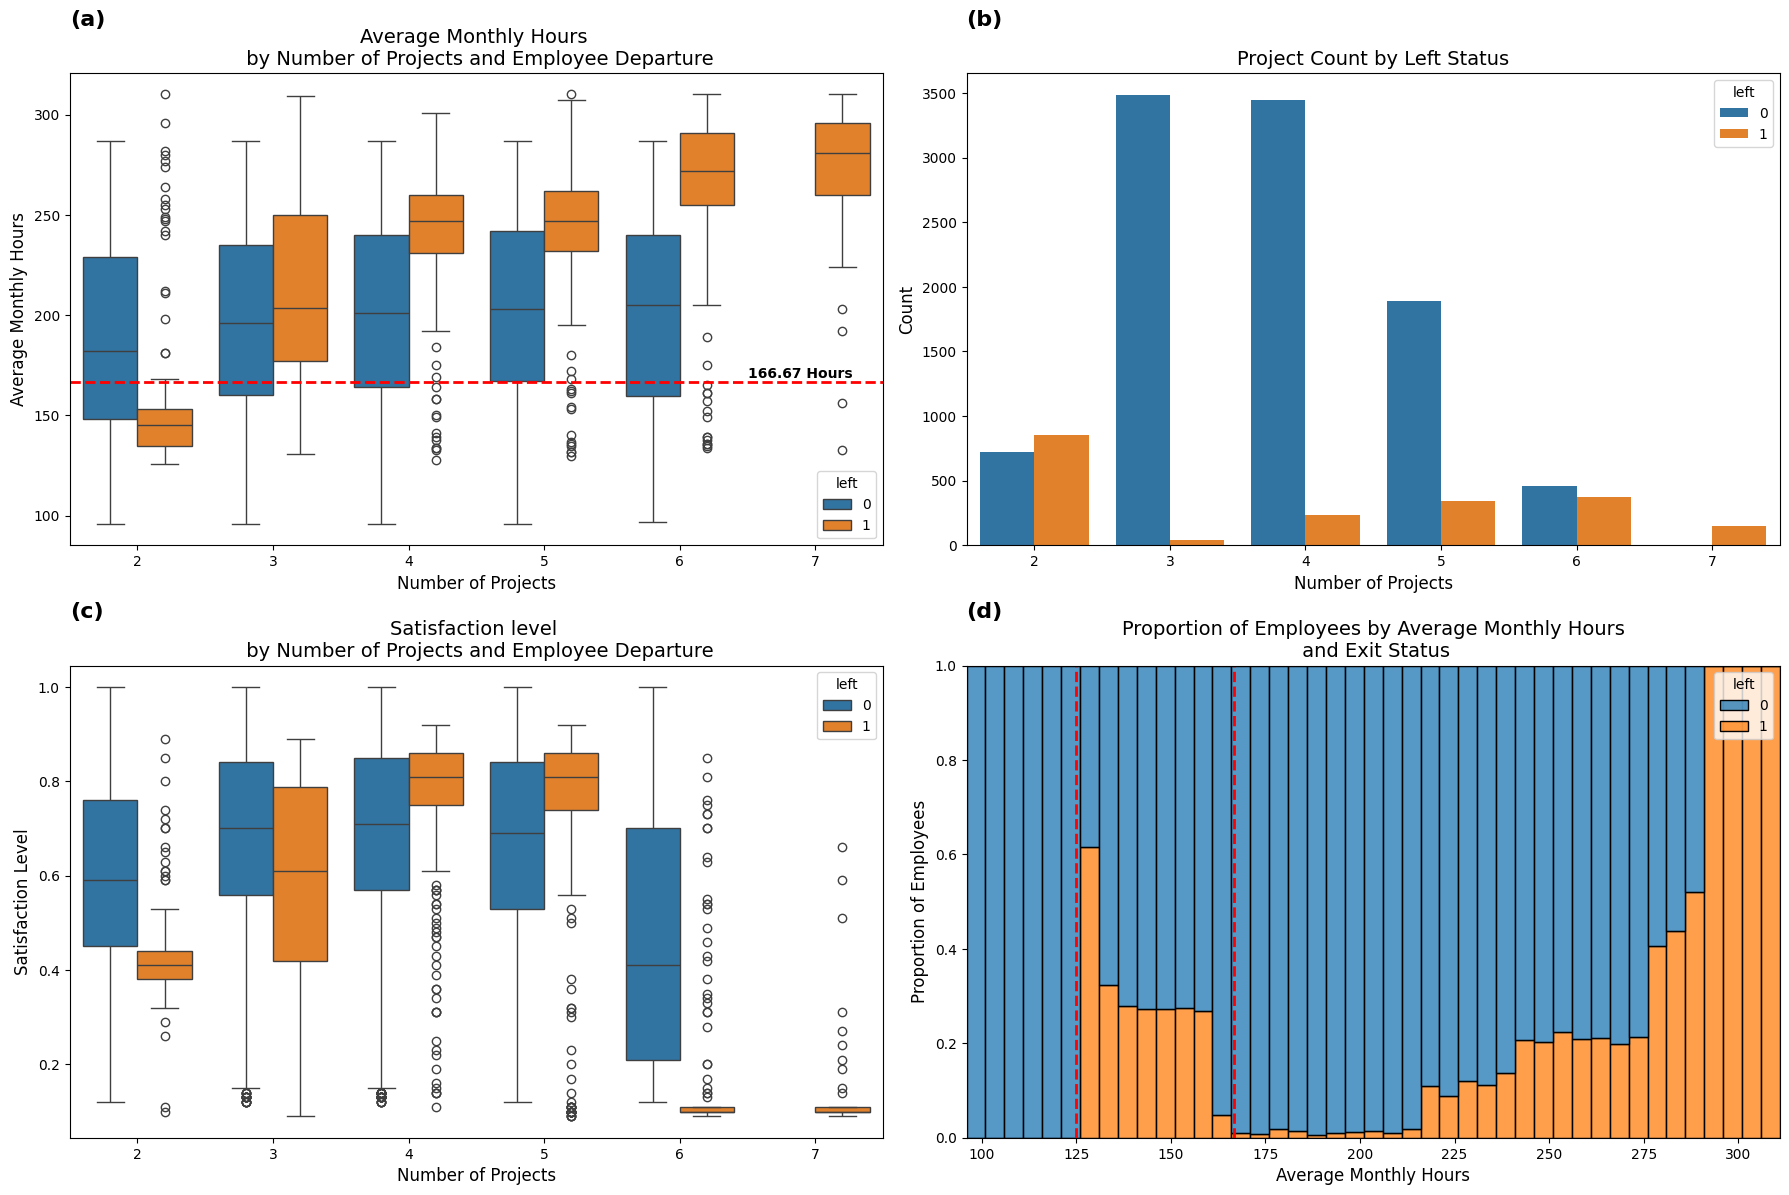

In [17]:
# Create a figure with four subplots
fig, ax = plt.subplots(2, 2, figsize=(18, 12))

# First chart: Boxplot of average monthly hours by number of projects and left status
sns.boxplot(x='number_project', y='average_monthly_hours', hue='left', data=df1, ax=ax[0, 0])
ax[0, 0].set_title('Average Monthly Hours \n by Number of Projects and Employee Departure', fontsize=14)
ax[0, 0].set_xlabel('Number of Projects', fontsize=12)
ax[0, 0].set_ylabel('Average Monthly Hours', fontsize=12)
ax[0, 0].axhline(y=166.67, color='red', linestyle='--', linewidth=2, label='166.67 Avg Monthly Hours')
ax[0, 0].text(x=4.5, y=169, s='166.67 Hours', color='black', fontsize=10, fontweight='bold')
# Add label 'a'
ax[0, 0].text(0, 1.1, '(a)', transform=ax[0, 0].transAxes, fontsize=16, fontweight='bold')

# Second chart: Countplot of project count by left status
sns.countplot(data=df1, x='number_project', hue='left', ax=ax[0, 1])
ax[0, 1].set_title('Project Count by Left Status', fontsize=14)
ax[0, 1].set_xlabel('Number of Projects', fontsize=12)
ax[0, 1].set_ylabel('Count', fontsize=12)
# Add label 'b'
ax[0, 1].text(0, 1.1, '(b)', transform=ax[0, 1].transAxes, fontsize=16, fontweight='bold')

# Third chart: Boxplot of satisfaction by number of projects and left status
sns.boxplot(x='number_project', y='satisfaction_level', hue='left', data=df1, ax=ax[1, 0])
ax[1, 0].set_title('Satisfaction level \n by Number of Projects and Employee Departure', fontsize=14)
ax[1, 0].set_xlabel('Number of Projects', fontsize=12)
ax[1, 0].set_ylabel('Satisfaction Level', fontsize=12)
# Add label 'c'
ax[1, 0].text(0, 1.1, '(c)', transform=ax[1, 0].transAxes, fontsize=16, fontweight='bold')

# Fourth chart: Histogram for Average Monthly Hours with proportions by exit status
bin_width = 5
bin_edges = np.arange(df1['average_monthly_hours'].min(), df1['average_monthly_hours'].max() + bin_width, bin_width)
sns.histplot(x='average_monthly_hours', hue='left', data=df1, bins=bin_edges, ax=ax[1, 1], multiple='fill', shrink=1)
ax[1, 1].set_title('Proportion of Employees by Average Monthly Hours\n and Exit Status', fontsize=14)
ax[1, 1].set_xlabel('Average Monthly Hours', fontsize=12)
ax[1, 1].set_ylabel('Proportion of Employees', fontsize=12)
ax[1, 1].axvline(x=166.67, color='red', linestyle='--', linewidth=2, label='166.67 Avg Monthly Hours')
ax[1, 1].axvline(x=125, color='red', linestyle='--', linewidth=2, label='125 Avg Monthly Hours')
# Add label 'd'
ax[1, 1].text(0, 1.1, '(d)', transform=ax[1, 1].transAxes, fontsize=16, fontweight='bold')

# Adjust layout and show the combined plot
plt.tight_layout()
plt.show()

- **Figure (a)** reveals interesting patterns related to employee attrition based on the number of projects worked on. Employees who stayed with the company (left = 0) generally exhibited a gradual increase in their average monthly work hours as the number of projects increased, with those handling six projects working an average of 198.62 hours. However, the variation in work hours was relatively moderate, indicating consistent work patterns among those who remained. On the other hand, employees who left the company (left = 1) showed a different trend: those with two projects worked significantly fewer hours (146.14) compared to those who left after working three or more projects, with average monthly hours rising sharply to 212.05 for those with three projects and 275.62 for those with seven projects.

This suggests that while employees who stayed worked a relatively stable number of hours, those who left the company tended to work longer hours, particularly those handling more projects. The higher standard deviations in the work hours for those leaving after three or more projects also suggest that these employees experienced greater variability in their workloads. This could point to increased stress, burnout, or dissatisfaction, especially for employees handling multiple projects. The data highlights that employees with higher workloads and longer hours, especially those working on three or more projects, might be more likely to leave due to exhaustion or lack of satisfaction, while those with fewer projects and lower hours tend to stay.

- **Figure (b)** reveals that the majority of employees who stayed (denoted by left = 0) are concentrated in projects with fewer numbers, particularly three, four, and five projects, with the highest number of employees staying on three projects (3,482 employees). However, regarding attrition, employees working on two projects have the highest count of departures, with 857 employees leaving compared to 725 staying. When considering proportions, the highest attrition rate is seen among employees working on seven projects, with 145 departures and no employees staying. It is also important to highlight the lower number of employees working on seven projects.

- **Figure (c)** shows that satisfaction levels peak between 4 and 5 projects. Conversely, satisfaction decreases when employees have fewer projects. Additionally, employees who leave with 6 or 7 projects exhibit the lowest satisfaction levels.

- **Figure (d)** shows that no employees left the company with average monthly hours lower than 125 hours. This group may consist of part-time employees. Between 125 and 166 hours, there is a large proportion of employees leaving the job (possibly those employees are being fired because they don't meet the 40-hour weekly requirement). Between 166 and 215 hours per month, the proportion of employees staying seems to be quite high, but with values higher than 215, the percentage of employees leaving the job starts to rise steadily, reaching 50% of employees leaving the job at 285 hours. When the average monthly hours exceed 290 hours, the percentage of employees leaving the job reaches 100%

------------------

Additionally, assuming a 40-hour workweek and two weeks of annual vacation, the average monthly working hours for employees working Monday through Friday is calculated as follows:

**(50 weeks×40 hours per week)÷12 months=166.67 hours per month**

This indicates that, apart from employees involved in two projects who left, every group —even those who remained with the company— logged significantly more hours than this. The data suggests that employees are overworked.

The data across multiple figures reveals significant insights about employee work patterns and attrition. Figure (a) highlights that employees who stayed with the company generally showed stable work hours, increasing slightly as the number of projects grew, while those who left worked longer hours, especially when managing multiple projects, potentially due to stress or burnout. Figure (b) indicates that employees working on fewer projects were more likely to stay, with attrition highest among those with two or seven projects. Figure (c) shows satisfaction peaked between four and five projects but declined with fewer or more projects. Figure (d) demonstrates that employees working higher monthly hours, especially over 290, had a 100% attrition rate, suggesting overwork as a contributing factor. The overall data implies that employees are working significantly more than the average monthly hours for a standard 40-hour workweek, indicating potential overwork across various groups.



Text(0, 0.5, 'Average monthly hours')

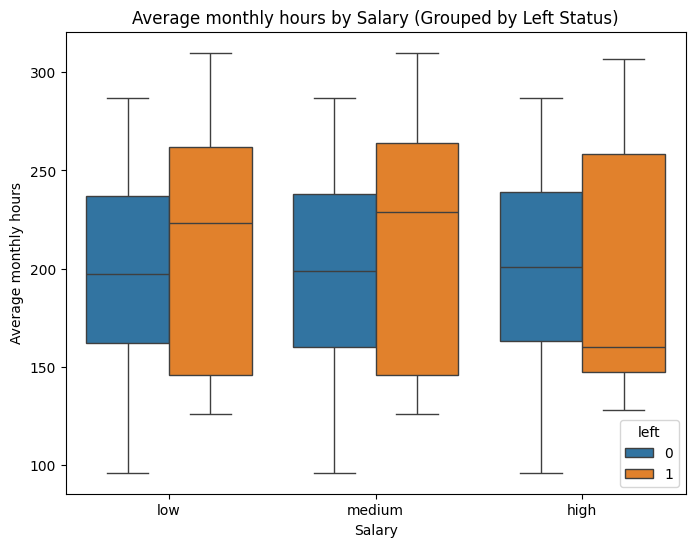

In [18]:

plt.figure(figsize=(8, 6))
sns.boxplot(data=df1, x='salary', y='average_monthly_hours', hue='left')

plt.title('Average monthly hours by Salary (Grouped by Left Status)')
plt.xlabel('Salary')
plt.ylabel('Average monthly hours')


- Analyzing the relationship between salary, average monthly hours, and employee attrition reveals key patterns. Employees who stayed (left = 0) have a relatively consistent mean of ~199 hours/month, regardless of salary level (low, medium, or high). Their work hours range between 96 and 287 hours.

- In contrast, employees who left (left = 1) worked slightly longer hours, averaging between 203 and 210 hours/month, with higher variability (standard deviation of ~61 hours). Notably, workers with low or medium salaries who left had the highest workloads, with some reaching up to 310 hours/month. This suggests that lower-paid employees may have been overworked, contributing to dissatisfaction and eventual resignation. Additionally, the median work hours for those who left (especially in low and medium salary groups) are significantly higher than for those who stayed, reinforcing the idea that excessive workload, particularly at lower salary levels, played a role in employee turnover.

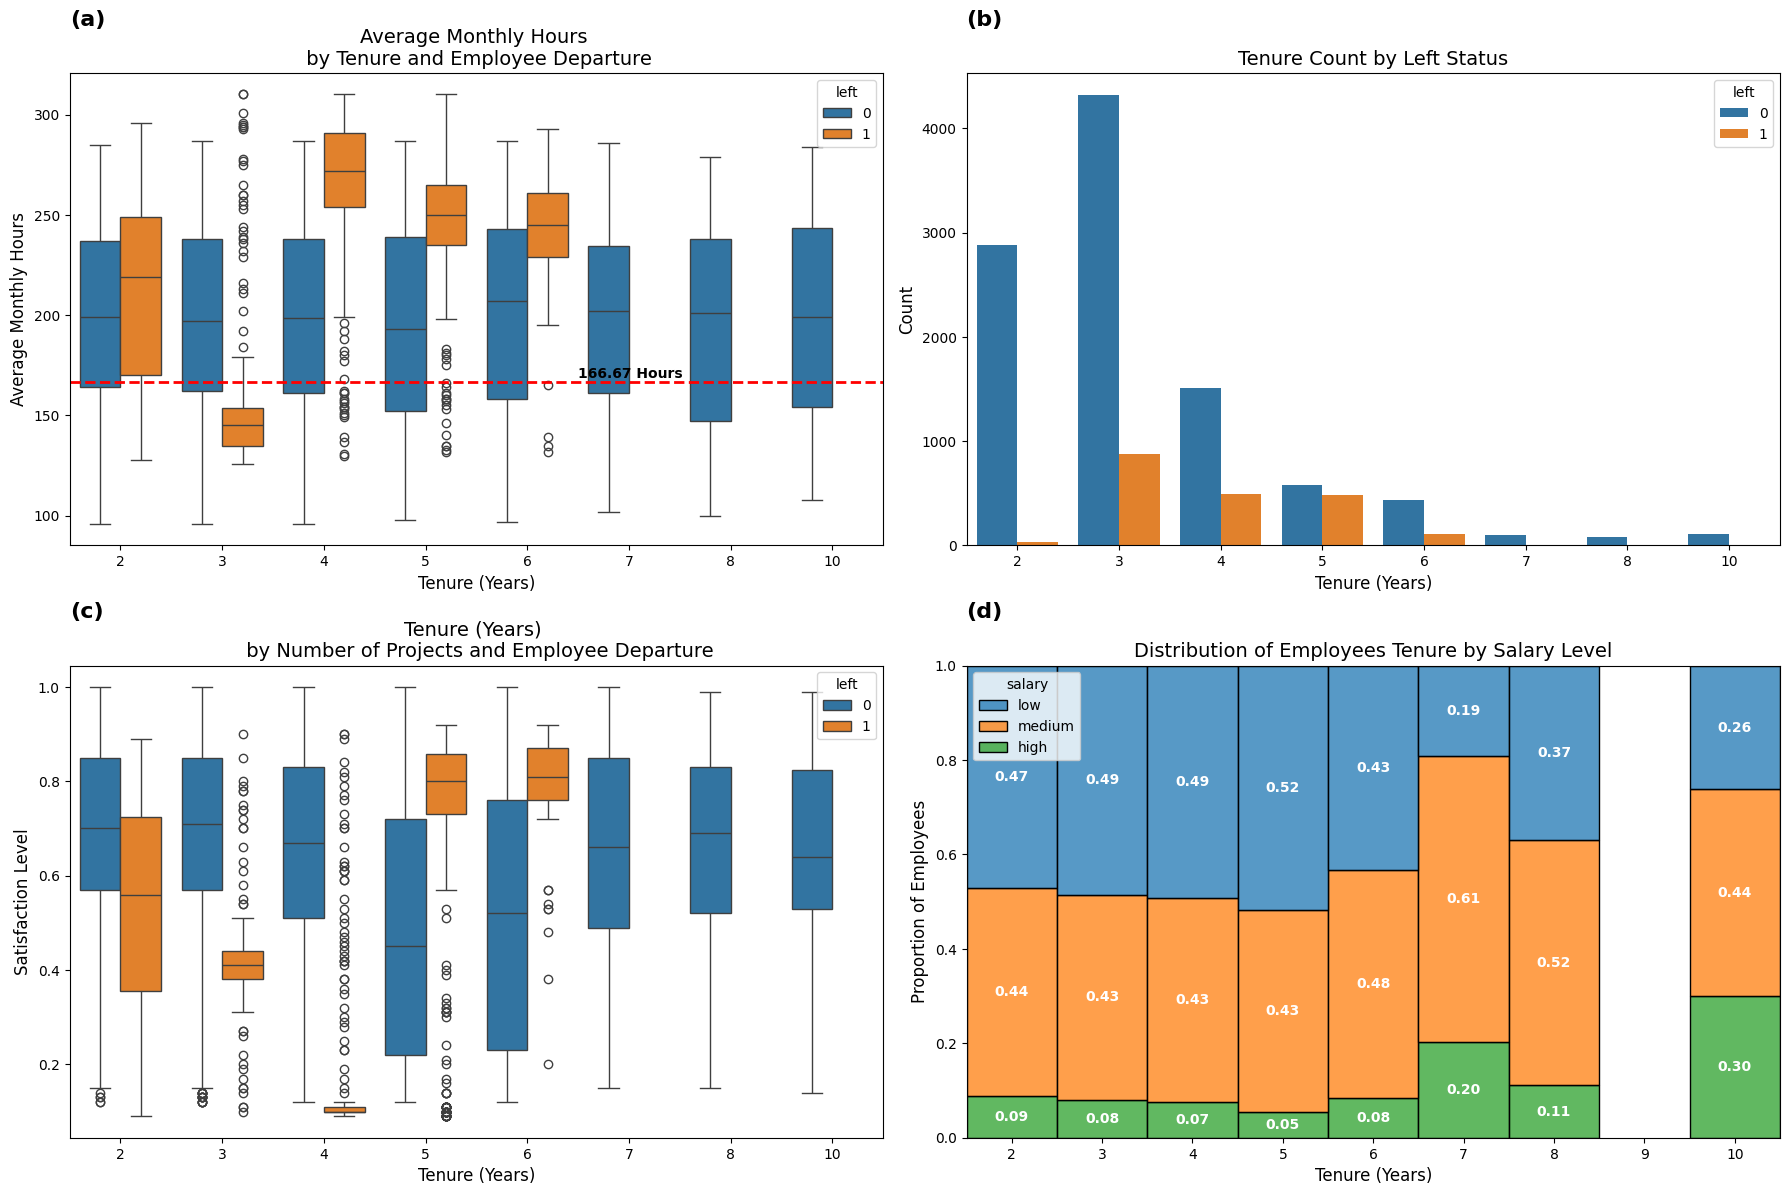

In [19]:

# Create a figure with four subplots
fig, ax = plt.subplots(2, 2, figsize=(18, 12))

# First chart: Boxplot of average monthly hours by tenure and left status
sns.boxplot(x='tenure', y='average_monthly_hours', hue='left', data=df1, ax=ax[0,0])
ax[0,0].set_title('Average Monthly Hours \n by Tenure and Employee Departure', fontsize=14)
ax[0,0].set_xlabel('Tenure (Years)', fontsize=12)
ax[0,0].set_ylabel('Average Monthly Hours', fontsize=12)
ax[0,0].axhline(y=166.67, color='red', linestyle='--', linewidth=2, label='166.67 Avg Monthly Hours')
ax[0,0].text(x=4.5, y=169, s='166.67 Hours', color='black', fontsize=10, fontweight='bold')
ax[0,0].text(0, 1.1, '(a)', transform=ax[0,0].transAxes, fontsize=16, fontweight='bold')

# Second chart: Countplot of tenure by left status
sns.countplot(data=df1, x='tenure', hue='left', ax=ax[0,1])
ax[0,1].set_title('Tenure Count by Left Status', fontsize=14)
ax[0,1].set_xlabel('Tenure (Years)', fontsize=12)
ax[0,1].set_ylabel('Count', fontsize=12)
ax[0,1].text(0, 1.1, '(b)', transform=ax[0,1].transAxes, fontsize=16, fontweight='bold')

# Third chart: Boxplot of satisfaction by tenure and left status
sns.boxplot(x='tenure', y='satisfaction_level', hue='left', data=df1, ax=ax[1, 0])
ax[1, 0].set_title('Tenure (Years) \n by Number of Projects and Employee Departure', fontsize=14)
ax[1, 0].set_xlabel('Tenure (Years)', fontsize=12)
ax[1, 0].set_ylabel('Satisfaction Level', fontsize=12)
ax[1, 0].text(0, 1.1, '(c)', transform=ax[1, 0].transAxes, fontsize=16, fontweight='bold')

# Fourth chart: Histogram for tenure with proportions by salary level
sns.histplot(data=df1, x='tenure', hue='salary', multiple='fill', discrete=True, shrink=1, ax=ax[1, 1])
ax[1, 1].set_title('Distribution of Employees Tenure by Salary Level', fontsize=14)
ax[1, 1].set_xlabel('Tenure (Years)', fontsize=12)
ax[1, 1].set_ylabel('Proportion of Employees', fontsize=12)
ax[1, 1].text(0, 1.1, '(d)', transform=ax[1, 1].transAxes, fontsize=16, fontweight='bold')

# Add labels to histogram bars (centered)
for container in ax[1, 1].containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:  # Avoid placing labels on empty bins
            center_y = bar.get_y() + height / 2  # Midpoint of stacked section
            ax[1, 1].text(
                bar.get_x() + bar.get_width() / 2, center_y, 
                f'{height:.2f}', ha='center', va='center', 
                fontsize=10, color='white', fontweight='bold'
            )  # <- This closing parenthesis was missing

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

- **In Figure (a)**, it can be observed that employees who leave their jobs have been working for 2 to 6 years. On the other hand, employees with 7 or more years of tenure do not leave their jobs. The majority of employees who have worked for 4, 5, or 6 years and decided to leave work more than 215 hours per month. In contrast, most employees with 2 years of tenure work an average of 166 to 215 hours per month. Finally, the majority of those who left their jobs had been working for 2 years, with a recorded workload ranging from 166 to 250 hours per month on average.

- In **Figure (b)**, it can be observed that the vast majority of employees who leave the company had been working for **3, 4, or 5 years**. Employees with **2 or 6 years** of tenure tend to stay.

- In **Figure (c)**, it can be observed that most employees who left the company after **3 years** had a satisfaction level of approximately **0.4**, while those who had worked for **4 years** had a satisfaction level of **0.1**. On the other hand, the majority of employees who had worked for **5 years** had a satisfaction level of around **0.8**.

- Finally, in **Figure (d)**, it can be observed that the highest number of employees with **low salaries** corresponds to those who have been working for **5 years**, while this group also has the **lowest number of employees with high salaries**. On the other hand, employees with **more than 7 years** of tenure have the **lowest proportion of low salaries** and the **highest proportion of high salaries**.

**In summary**, employees with 3 to 6 years of tenure are the most likely to leave, often working longer hours and reporting lower satisfaction levels compared to those who stay. Also, employees with 5 years of tenure are the most likely to have low salaries, while those with 7+ years have the highest proportion of high salaries. This may explain why employees with 5 years of tenure are likely to leave

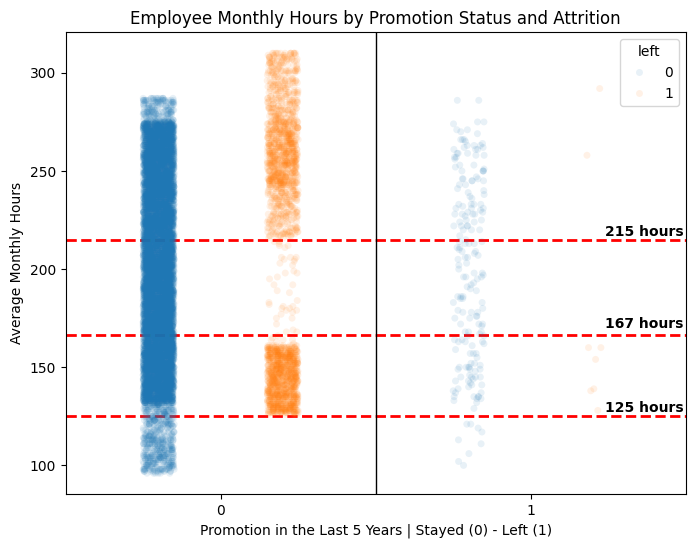

In [20]:
plt.figure(figsize=(8, 6))
sns.stripplot(data= df1, x='promotion_last_5years', y='average_monthly_hours', hue='left', alpha = 0.1, jitter=True, dodge=True)

# Labels
plt.xlabel("Promotion in the Last 5 Years | Stayed (0) - Left (1)")
plt.ylabel("Average Monthly Hours")
plt.title("Employee Monthly Hours by Promotion Status and Attrition")
plt.axhline(y=166.67, color='red', linestyle='--', linewidth=2)
plt.text(x=1.24, y=170, s='167 hours', color='black', fontsize=10, fontweight='bold')
plt.axhline(y=215, color='red', linestyle='--', linewidth=2)
plt.text(x=1.24, y=217, s='215 hours', color='black', fontsize=10, fontweight='bold')
plt.axhline(y=125, color='red', linestyle='--', linewidth=2)
plt.text(x=1.24, y=127, s='125 hours', color='black', fontsize=10, fontweight='bold')
plt.axvline(x= 0.5, color='black', linewidth=1)
# Show plot
plt.show()

The plot above presents information about employees' average monthly hours based on whether they were promoted in the last five years and whether they left or stayed:

- Employees working between 125 and 167 average monthly hours without a promotion tend to leave their jobs (they were probably fired).
- Employees working between 167 and 215 average monthly hours without a promotion tend to stay in their jobs.
- Employees working more than 215 average monthly hours without a promotion tend to leave their jobs (they probably quit).
- Very few employees who were promoted in the last five years left.
- Very few employees who worked the most hours were promoted.



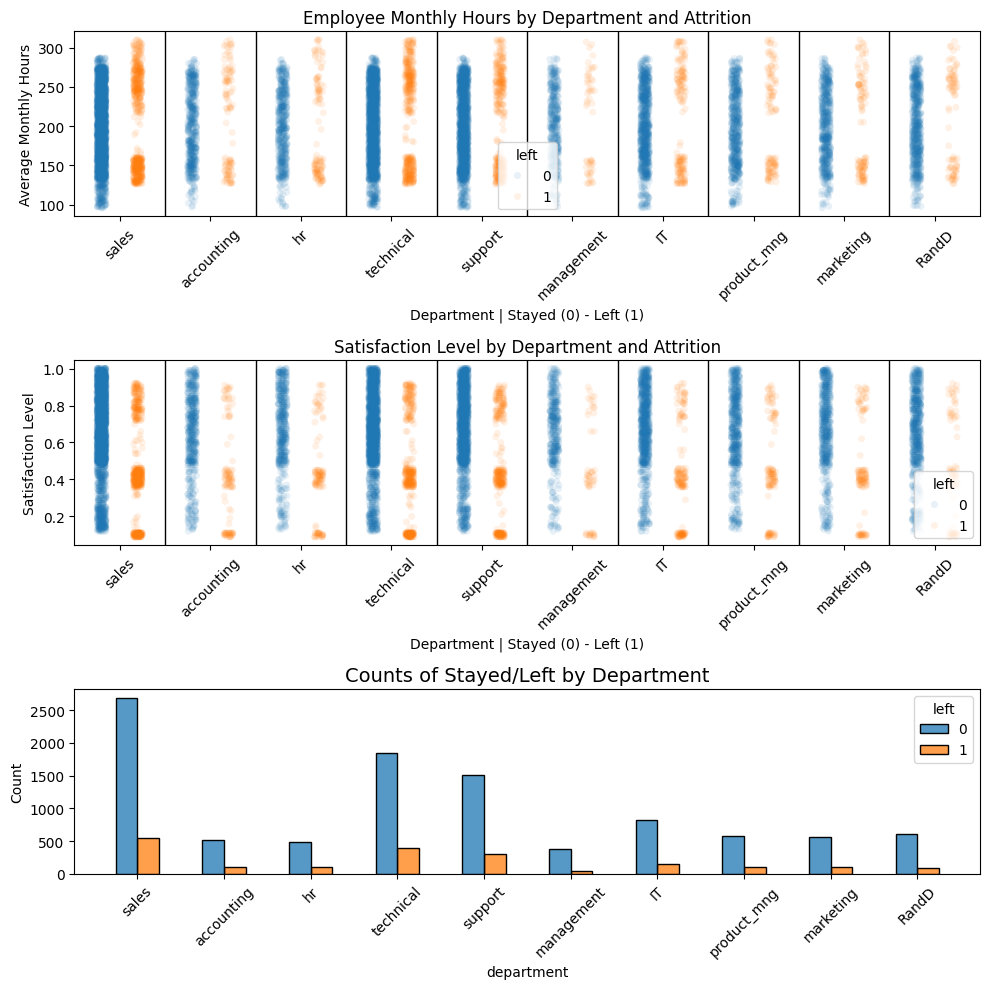

In [21]:

# Create a figure with 3 subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 10))

# First chart: Employee Monthly Hours by Department and Attrition
sns.stripplot(data=df1, x='department', y='average_monthly_hours', hue='left', 
              alpha=0.1, jitter=True, dodge=True, ax=axes[0])
axes[0].set_xlabel("Department | Stayed (0) - Left (1)")
axes[0].set_ylabel("Average Monthly Hours")
axes[0].set_title("Employee Monthly Hours by Department and Attrition")
axes[0].set_xticks(range(len(df1['department'].unique())))  # Set fixed tick positions
axes[0].set_xticklabels(df1['department'].unique(), rotation=45)
for i in range(len(df1['department'].unique()) - 1):
    axes[0].axvline(x=i + 0.5, color='black', linewidth=1)

# Second chart: Satisfaction Level by Department and Attrition
sns.stripplot(data=df1, x='department', y='satisfaction_level', hue='left', 
              alpha=0.1, jitter=True, dodge=True, ax=axes[1])
axes[1].set_xlabel("Department | Stayed (0) - Left (1)")
axes[1].set_ylabel("Satisfaction Level")
axes[1].set_title("Satisfaction Level by Department and Attrition")
axes[1].set_xticks(range(len(df1['department'].unique())))  # Set fixed tick positions
axes[1].set_xticklabels(df1['department'].unique(), rotation=45)
for i in range(len(df1['department'].unique()) - 1):
    axes[1].axvline(x=i + 0.5, color='black', linewidth=1)

# Third chart: Counts of Employees Stayed/Left by Department
sns.histplot(data=df1, x='department', hue='left', discrete=True, 
             hue_order=[0, 1], multiple='dodge', shrink=0.5, ax=axes[2])
axes[2].set_title('Counts of Stayed/Left by Department', fontsize=14)
axes[2].set_xticks(range(len(df1['department'].unique())))  # Set fixed tick positions
axes[2].set_xticklabels(df1['department'].unique(), rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

- No department shows a significant difference in the proportion of employees who left compared to those who stayed. Additionally, employees across different departments appear to work similar amounts of hours and have comparable satisfaction levels. The sales, technical, and support departments have the highest number of employees. 

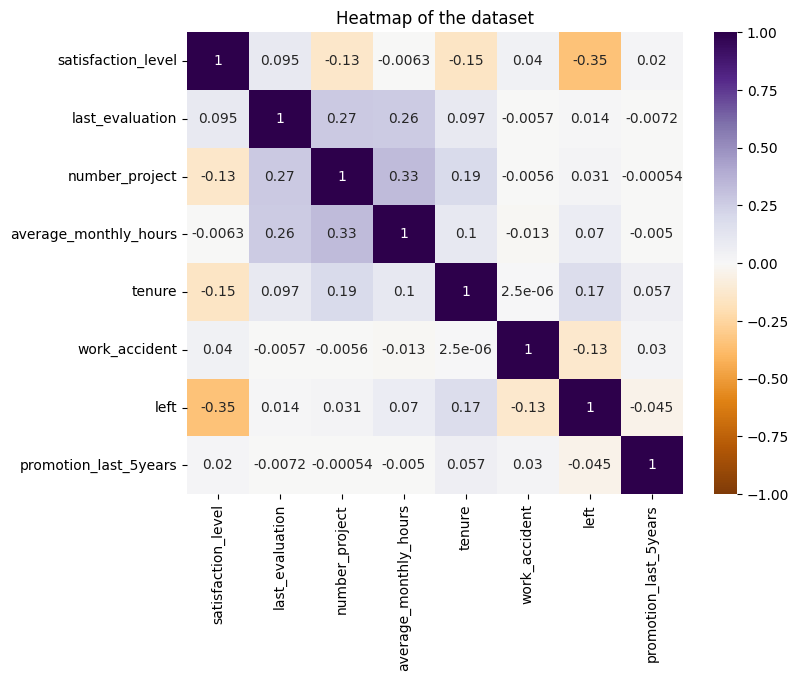

In [22]:

plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(
    df1[['satisfaction_level',	'last_evaluation',	'number_project',	'average_monthly_hours',	'tenure',	'work_accident',	'left',	'promotion_last_5years']]
    .corr(numeric_only=True),
    vmin=-1,
    vmax=1, 
    annot=True, 
    cmap="PuOr")
plt.title("Heatmap of the dataset")
plt.show()

- The correlation heatmap confirms that the number of projects, monthly hours, and evaluation scores are positively correlated with one another, while the likelihood of an employee leaving is negatively correlated with their satisfaction level. Additionally, satisfaction level shows a negative correlation with the "left" variable.

### Insights
It seems that poor management is contributing to employee attrition. Employees who leave tend to work longer hours, handle more projects, and report lower satisfaction levels. The lack of promotions or favorable evaluations can make long working hours feel unrewarding. A significant portion of employees may be experiencing burnout. Additionally, it appears that employees who have been with the company for more than six years are less likely to leave.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

-  *The correlation matrix indicates that most features have weak correlations with the target variable (left), which suggests that a simple linear model like Logistic Regression may not perform well. Additionally, there may be non-linear relationships between variables that Logistic Regression cannot capture without manual feature engineering. While a Decision Tree could model these relationships, it is prone to overfitting, especially with weakly correlated features. In contrast, Random Forest, as an ensemble method, mitigates overfitting by combining multiple decision trees, improving accuracy and robustness. Furthermore, Random Forest can naturally handle feature interactions and works well when individual predictors have limited predictive power on their own. Given these factors, Random Forest is the most suitable choice for this classification problem.*

Before splitting the data, I encode the non-numeric variables. The department variable is dummy-coded as it's categorical, while the salary variable, being ordinal, is converted to numerical values ranging from 0 to 2. This ensures the data is ready for modeling.

In [23]:
# Copy the dataframe
df_enc = df1.copy()
# Encode the `salary` column as an ordinal numeric category
df_enc['salary'] = (df_enc['salary'].astype('category').cat.set_categories(['low', 'medium', 'high']).cat.codes)

df_enc.describe()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.00000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929,0.60387
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012,0.63590
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.00000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000,0.00000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,1.00000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000,1.00000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,2.00000


In [24]:
# Dummy encode the `department` column
df_enc = pd.get_dummies(df_enc, drop_first=False)

# Display the new dataframe
df_enc.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,1,0,1,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False


*Isolate the outcome variable.*

In [25]:
# Isolate the outcome variable
y = df_enc['left']

# Display the first few rows of `y`
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

*Select the features (independent variables).*

In [26]:
# Select the features
X = df_enc.drop('left', axis = 1)


# Display the first few rows of `X`
X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,False,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,0,1,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,0,0,False,False,False,False,False,False,False,True,False,False


*Spliting the data into training, validating, and testing sets.*

In [27]:
### YOUR CODE HERE ###
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.25, stratify= y, random_state= 0)

### **Decision tree**
*Constructing a decision tree model and setting up cross-validated grid-search to exhuastively search for the best model parameters.*

In [28]:
# Instantiate model
tree = DecisionTreeClassifier(random_state= 0)

# Assigning hyperparameters to search over

cv_params = {'max_depth': [4, 7, 10, None],
      'min_samples_leaf': [1, 2, 5, 10],
      'min_samples_split': [2, 4, 6]}

# Assinging dictionary to metrics
scoring = {'precision' : 'precision',
           'recall' : 'recall',
           'accuracy' : 'accuracy',
           'f1' : 'f1',
           'roc_auc' : 'roc_auc'}

# Instantiate GridSearch
treeGS = GridSearchCV(tree, cv_params, scoring= scoring, cv = 4, refit= 'recall') # refit='recall' since it is needed to ensure identifying as many employees who might leave as possible, allowing us to focus on retaining them."

*Fitting the decision tree model to the training data*

In [29]:
treeGS.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 7, 10, None],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 4, 6]},
             refit='recall',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

*Identifying the optimal values for the decision tree parameters.*

In [30]:
treeGS.best_params_

{'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}

*Identifying the highest recall score achieved by the decision tree model on the training set*

In [31]:
print('{tgs:.6f}'.format(tgs =treeGS.best_score_))

0.916949


This is a high recall score, indicating that the model is highly effective at predicting employees who are likely to leave


*Writing a function that will help to extract all the scores from the grid search.*

In [32]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
  
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })
  
    return table

*Using the function just defined to get all the scores from the grid search.*

In [33]:
treeGS_cv_results = make_results('decision tree cv', treeGS, 'recall')
treeGS_cv_results

,model,precision,recall,F1,accuracy,auc
0,decision tree cv,0.915772,0.916949,0.916319,0.972201,0.967117


These scores from the decision tree model strongly suggest good model performance.

However, since decision trees can be prone to overfitting, I will construct a random forest model next, as it helps prevent overfitting by combining multiple trees to make predictions.

#### Random Forest

  *Building a random forest model and setting up a cross-validated grid search to thoroughly explore the optimal model parameters.*

In [34]:
# Instantiate model
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Assinging dictionary to metrics
scoring = {'precision' : 'precision',
           'recall' : 'recall',
           'accuracy' : 'accuracy',
           'f1' : 'f1',
           'roc_auc' : 'roc_auc'}


# Instantiate GridSearch
rfGS = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='recall')

  *Fitting the random forest model to the training data.*

In [35]:
rfGS.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='recall',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

*Defining a path to save the model*

In [36]:
path = r'C:\Users\Fran\Desktop\Google Certificates\Google Advanced Data Analytics Professional Certificate\7 Google Advanced Data Analytics Capstone\M1\2 Complete the capstone project\2 lab\2'


*Create functions to pickle the model and load it back when needed.*

In [37]:
def write_pickle(path, model_object, save_as:str):
    '''
    In: 
        path:         path of folder where you want to save the pickle
        model_object: a model you want to pickle
        save_as:      filename for how you want to save the model

    Out: A call to pickle the model in the folder indicated
    '''    

    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [38]:
def read_pickle(path, saved_model_name:str):
    '''
    In: 
        path:             path to folder where you want to read from
        saved_model_name: filename of pickled model you want to read in

    Out: 
        model: the pickled model 
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

    return model

*Utilize the functions defined earlier to save the model as a pickle file and subsequently load it.*

In [39]:
# Write pickle
write_pickle(path, rfGS, 'hr_rfgs')

In [40]:
# Read pickle
rfGS = read_pickle(path, 'hr_rfgs')

*Determine the highest recall score achieved by the random forest model on the training set.*

In [41]:
print('{rfbs:.6f}'.format(rfbs = rfGS.best_score_))

0.917618


*Determine the optimal parameter values for the random forest model.*

In [42]:
# Check best params
rfGS.best_params_

{'max_depth': 3,
 'max_features': 1.0,
 'max_samples': 1.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

*Gather the evaluation scores for the decision tree and random forest models on the training set.*

In [43]:
# Get all CV scores
rfGS_cv_results = make_results('random forest cv', rfGS, 'recall')
print(treeGS_cv_results)
print(rfGS_cv_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.915772  0.916949  0.916319  0.972201  0.967117
              model  precision    recall        F1  accuracy       auc
0  random forest cv   0.835898  0.917618  0.874658  0.956299  0.971974


- The evaluation scores of the decision tree model are generally higher than those of the random forest model, except for recall, where the random forest model achieves a slightly higher score (approximately 0.001). The decision tree model outperforms the random forest model in precision, F1 score, accuracy, and AUC. However, the difference in recall is negligible, indicating that while the random forest model slightly lags in precision and other metrics, its recall performance remains comparable.

- Given that the primary goal is to minimize the number of employees who leave undetected, the random forest model might be slightly better because it has a marginally higher recall score (0.917618 vs. 0.916949), which means it is slightly better at identifying employees who are likely to leave.

In this case, I would recommend the random forest model, as recall is the priority. Although its precision and other metrics are lower than the decision tree model, its recall is crucial for the goal of identifying potential employee departures.

***Next, evaluate the final model on the test set.***

*Creating a function to compute and retrieve all evaluation scores from a model's predictions.*

In [44]:
def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In: 
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''

    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })
  
    return table

*Use the best-performing model in terms of recall to make predictions on the test set.*

In [45]:
rfGS_test_scores = get_scores('random forest test', rfGS, X_test, y_test)
rfGS_test_scores

,model,precision,recall,f1,accuracy,AUC
0,random forest test,0.867173,0.917671,0.891707,0.962975,0.944835


The validation scores are closely aligned with the test scores, which is a positive indicator. This suggests that good generalization has been achieved by the model, and overfitting to the validation data is not occurring. Since the test set was used solely for final evaluation, greater confidence can be placed in the model's performance on this data as a representation of how it will perform on new, unseen data.

In [46]:
rfGS_test_scores = get_scores('random forest test', rfGS, X_test, y_test)
rfGS_test_scores

,model,precision,recall,f1,accuracy,AUC
0,random forest test,0.867173,0.917671,0.891707,0.962975,0.944835


### Refining the model
#### *Feature engeneering*

The high evaluation scores may warrant skepticism, as there is a possibility of data leakage. Data leakage occurs when information that should not be available during training is included, either because it appears in the test data or because it would not be accessible when the model is deployed. This can lead to inflated performance metrics that do not translate to real-world scenarios.

In this case, satisfaction levels may not be consistently reported for all employees, making the satisfaction_level variable unreliable. Additionally, the average_monthly_hours variable could contribute to data leakage. If employees have already decided to leave or have been identified for termination, their working hours may be reduced, making this feature less predictive in a real-world deployment.

The initial decision tree and random forest models included all available variables. In the next phase, feature engineering will be applied to refine the models. The satisfaction_level variable will be removed, and a new feature called overwork_hours, will be introduced to approximate whether an employee is overburdened with work. Is the number of hours an employee works beyond 167 hours per month, with values below this threshold set to zero.

In [47]:
# Drop `satisfaction_level` and save resulting dataframe in new variable
df_enc2 = df_enc.drop('satisfaction_level', axis=1)

# Display first few rows of new dataframe
df_enc2.head()

,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
1,0.86,5,262,6,0,1,0,1,False,False,False,False,False,False,False,True,False,False
2,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False
3,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False
4,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False


*Creating the 'overwork_hours' column.*

In [48]:
# Create `overworked` column. For now, it's identical to average monthly hours.
df_enc2['overwork_hours'] = df_enc2['average_monthly_hours']

# Inspect max and min average monthly hours values
print('Max hours:', df_enc2['overwork_hours'].max())
print('Min hours:', df_enc2['overwork_hours'].min())

Max hours: 310
Min hours: 96


*The average monthly hours for a standard 50-week work year (5 days per week, 8 hours per day) is approximately 166.67. Employees working more than 167 hours per month can be classified as overworked.*



In [49]:
# Define `overworked` as working > 175 hrs/week
df_enc2['overwork_hours'] = (df_enc2["overwork_hours"] - 167).clip(lower=0)

# Display first few rows of new column
df_enc2.head()

,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,overwork_hours
0,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False,0
1,0.86,5,262,6,0,1,0,1,False,False,False,False,False,False,False,True,False,False,95
2,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False,105
3,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False,56
4,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False,0


*Dropping the average_monthly_hours column.*

In [50]:
# Drop the `average_monthly_hours` column
df_enc2 = df_enc2.drop('average_monthly_hours', axis=1)

# Display first few rows of resulting dataframe
df_enc2.head()

,last_evaluation,number_project,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,overwork_hours
0,0.53,2,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False,0
1,0.86,5,6,0,1,0,1,False,False,False,False,False,False,False,True,False,False,95
2,0.88,7,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False,105
3,0.87,5,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False,56
4,0.52,2,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False,0


*Isolate the features and target variables again*

In [51]:
# Isolate the outcome variable
y = df_enc2['left']

# Select the features
X = df_enc2.drop('left', axis=1)

*Split the data into training and testing sets.*

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

### Decision tree with featuring engeneering

In [53]:
# Instantiate model
tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [4, 7, 10, None],
      'min_samples_leaf': [1, 2, 5, 10],
      'min_samples_split': [2, 4, 6]}

# Assinging dictionary to metrics
scoring = {'precision' : 'precision',
           'recall' : 'recall',
           'accuracy' : 'accuracy',
           'f1' : 'f1',
           'roc_auc' : 'roc_auc'}

# Instantiate GridSearch
tree2 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='recall')

*Fitting the model*

In [54]:
tree2.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 7, 10, None],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 4, 6]},
             refit='recall',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

*Finding best parameters*

In [55]:
# Check best params
tree2.best_params_

{'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2}

*Finding best score*

In [56]:
# Check best recall score on CV
print('recall best score: {r:.6f}'.format(r = tree2.best_score_))

recall best score: 0.908912


This model performs very well, similar to the one that included satisfaction levels and detailed work hours data.

*Checking the other scores*

In [57]:
# Get all CV scores
tree2_cv_results = make_results('decision tree2 cv', tree2, 'recall')
print(treeGS_cv_results)
print(tree2_cv_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.915772  0.916949  0.916319  0.972201  0.967117
               model  precision    recall        F1  accuracy       auc
0  decision tree2 cv   0.906622  0.908912  0.907669  0.969309  0.955583


Some of the scores dropped by around 0.01, which is expected since fewer features were included in this version of the model. However, the overall performance remains strong.

### *Random Forest with featuring engeneering*

In [58]:
# Instantiate model
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Assinging dictionary to metrics
scoring = {'precision' : 'precision',
           'recall' : 'recall',
           'accuracy' : 'accuracy',
           'f1' : 'f1',
           'roc_auc' : 'roc_auc'}

# Instantiate GridSearch
rf2 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='recall')

*fitting the model*

In [59]:
#fitting the model
rf2.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='recall',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

*Write pickle*

In [60]:
write_pickle(path, rf2, 'hr_rf2')

*Read in pickle*

In [61]:
rf2 = read_pickle(path, 'hr_rf2')

*Check for best parameters*

In [62]:

rf2.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 1.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 500}

*Check for best recall score*

In [63]:
rf2.best_score_

np.float64(0.9062325271322275)

*Get all CV scores*

In [64]:
rf2_cv_results = make_results('random forest2 cv', rf2, 'recall')
print(tree2_cv_results)
print(rf2_cv_results)

               model  precision    recall        F1  accuracy       auc
0  decision tree2 cv   0.906622  0.908912  0.907669  0.969309  0.955583
               model  precision    recall        F1  accuracy       auc
0  random forest2 cv   0.896144  0.906233  0.901073  0.966974  0.972141


Although the recall for the random forest is marginally lower, the random forest offers significant advantages over the decision tree, such as improved generalization, better handling of overfitting, and greater robustness to noisy data. These benefits make random forest a more reliable model overall, even with a small trade-off in recall. The slight difference in recall does not outweigh the improved stability and flexibility of the random forest, making it a better choice in this context.

*Now, evaluate the champion model on the test set.*

In [65]:
rf2_test_scores = get_scores('random forest2 test', rf2, X_test, y_test)
rf2_test_scores

,model,precision,recall,f1,accuracy,AUC
0,random forest2 test,0.913306,0.909639,0.911469,0.970647,0.946219


This seems to be a stable, well-performing final model.



*Plotting a confusion matrix will help visualize how well the model is performing on the test set.*

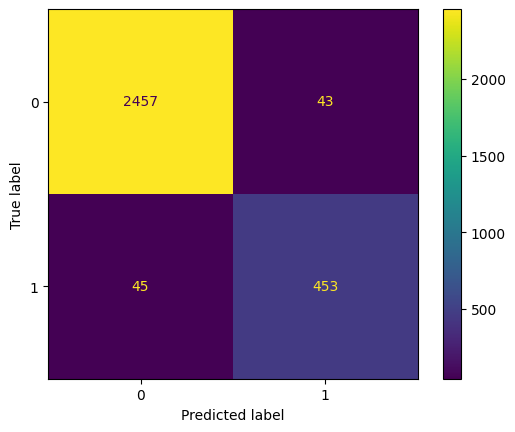

In [66]:
# Generate array of values for confusion matrix
preds = rf2.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=rf2.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf2.classes_)
disp.plot()

The model correctly identified 453 workers who left (True Positives) and 2457 workers who stayed (True Negatives). However, it misclassified 43 workers who stayed as having left (False Positives) and 45 workers who left as staying (False Negatives). But this is still a strong model, as the true positives and true negatives are significantly higher than the misclassifications.

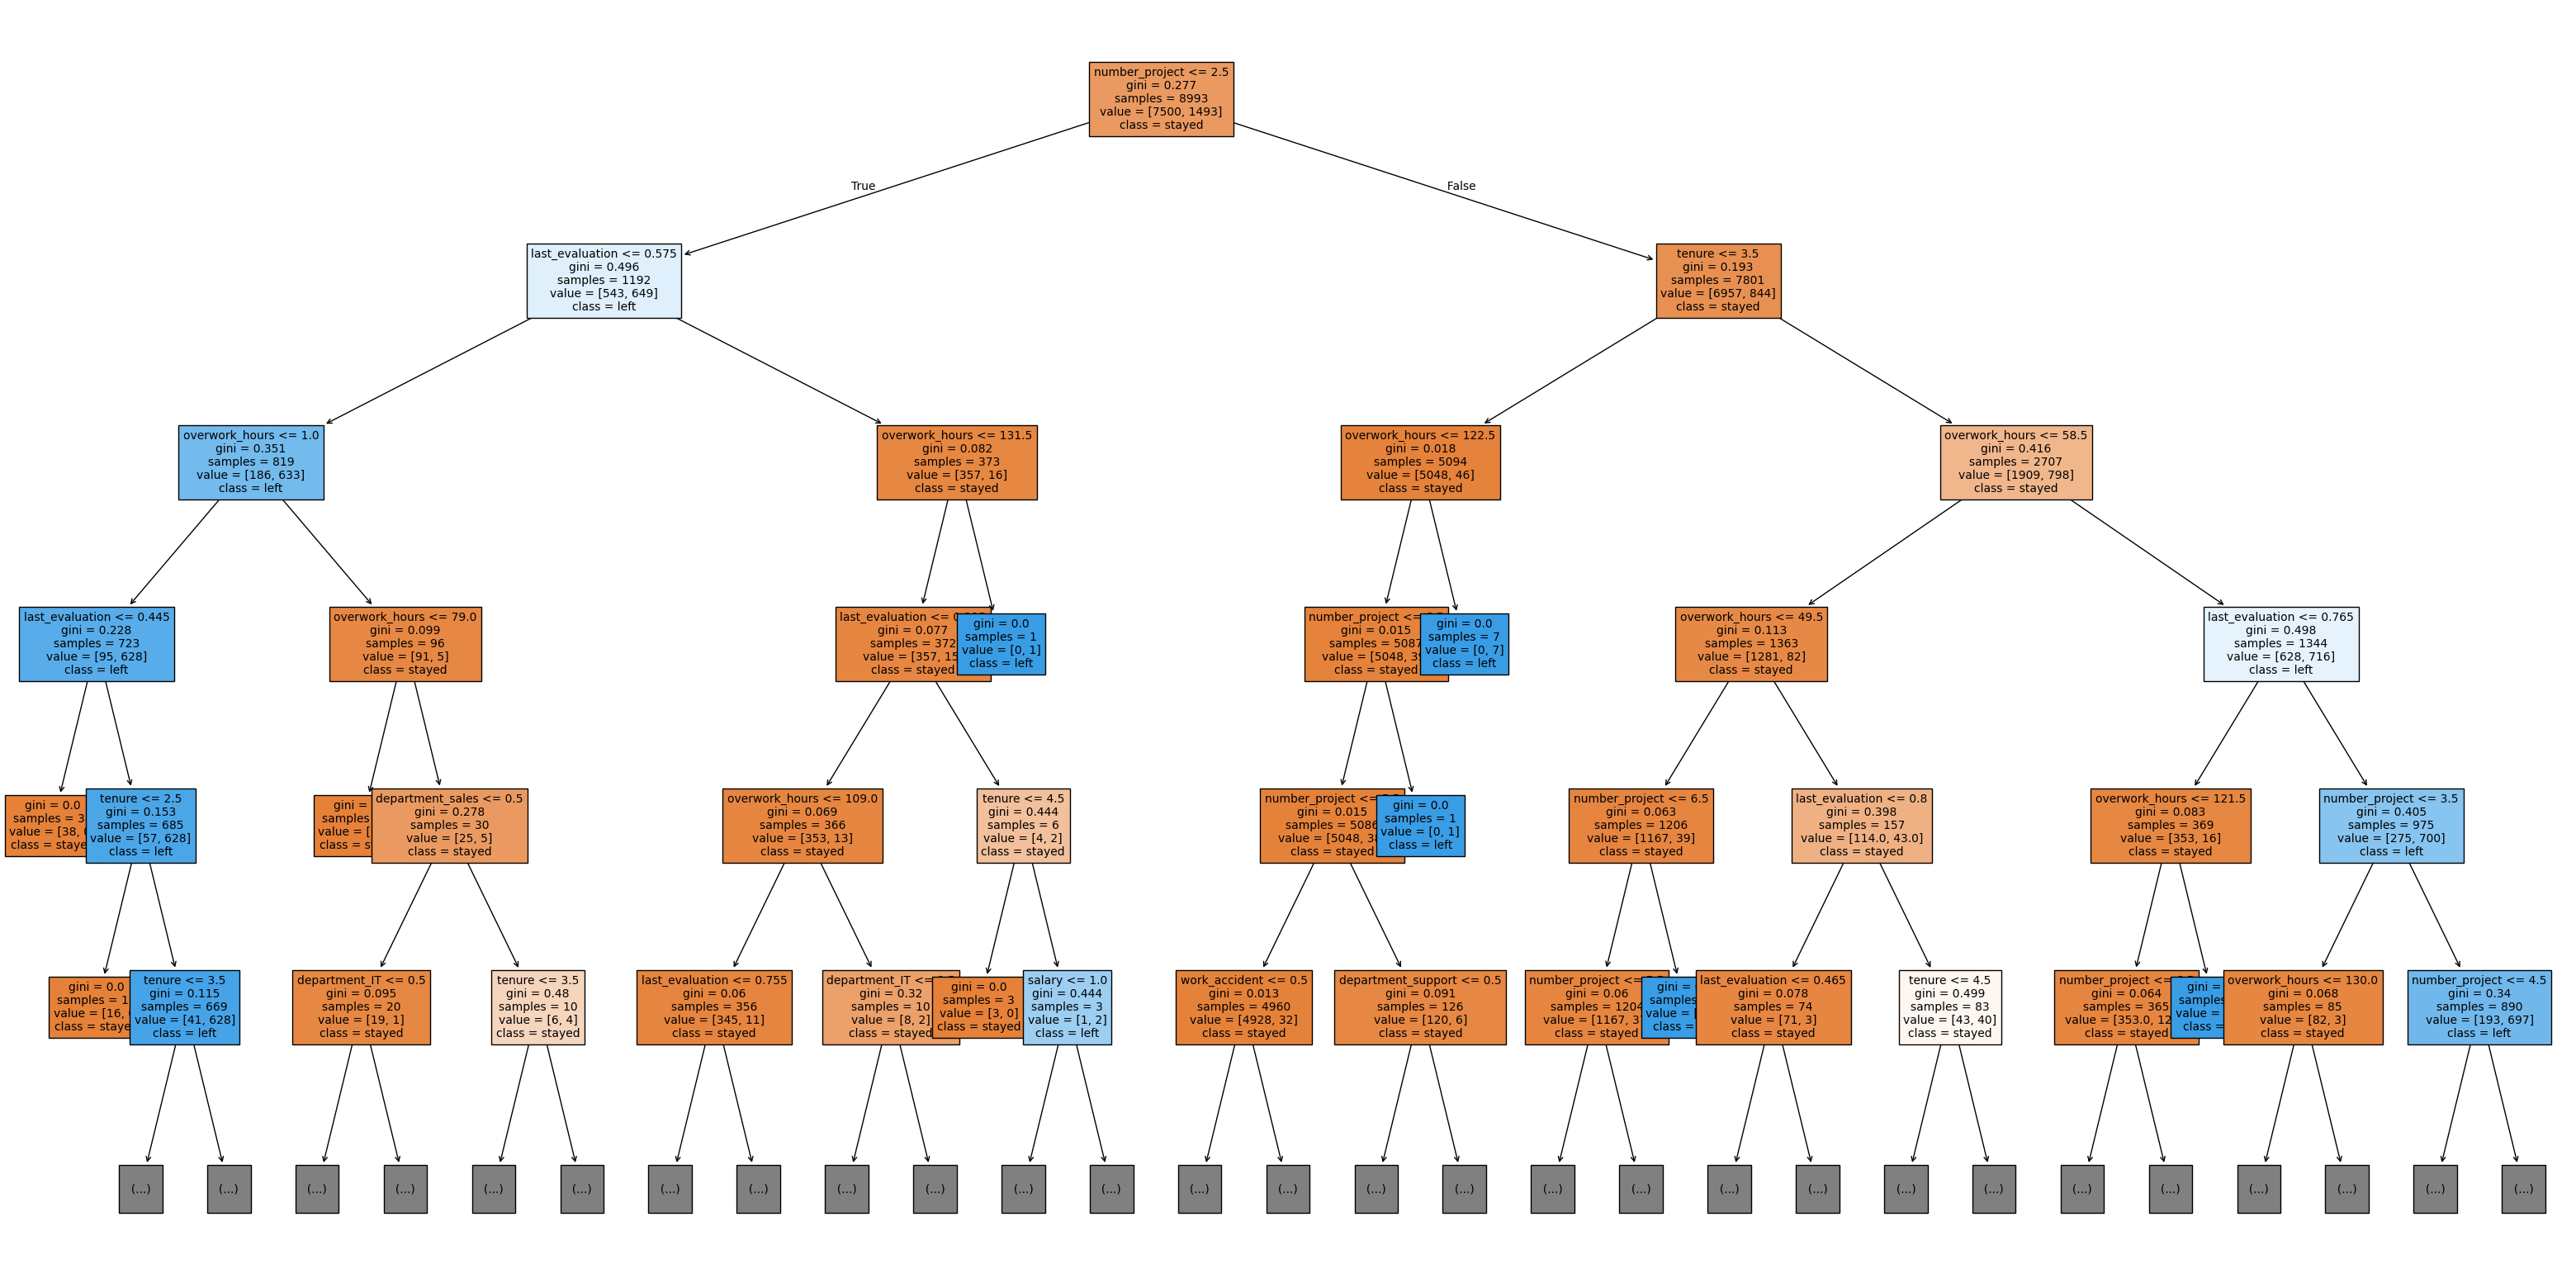

In [67]:
# Plot the tree
plt.figure(figsize=(40,20))  # Adjust the figure size to be more manageable
plot_tree(tree2.best_estimator_,
          max_depth=5,
          fontsize=10,
          feature_names=X.columns, 
          class_names=['stayed', 'left'],  # Class names should be a list
          filled=True)


plt.show()



### *Decision tree feature importance*
Now lets check the feature importance of from the Random Forest 

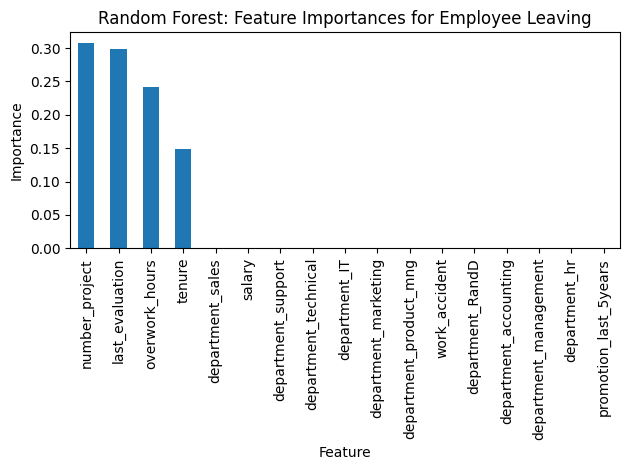

In [68]:
importances = rf2.best_estimator_.feature_importances_
rf_importances = pd.Series(importances, index=X_test.columns)

rf_importances = rf_importances.sort_values(ascending=False)

fig, ax = plt.subplots()
rf_importances.plot.bar(ax=ax)

ax.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
ax.set_xlabel("Feature")
ax.set_ylabel("Importance")

fig.tight_layout()

The plot above indicates that in this random forest model, the most important variables for predicting the outcome variable "left" are last_evaluation, number_project, overwork_hours, and tenure, in that order. These variables align with those used by the decision tree model.

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

After conducting feature engineering, the decision tree model achieved an AUC of 93.8%, precision of 87.0%, recall of 90.4%, F1-score of 88.7%, and accuracy of 96.2% on the test set. The random forest showed a slight advantage in AUC (97.2% vs. 95.6%) but had marginally lower accuracy. Both models performed similarly overall, with the random forest slightly excelling in distinguishing between classes

### Conclusion, Recommendations, Next Steps

The analysis and feature importances from the models indicate that employee overwork is a significant factor contributing to dissatisfaction and turnover at the company.

To improve retention and overall employee satisfaction, the following recommendations are suggested:

- **Cap Project Load:** Limit the number of projects an employee can manage to avoid overburdening them, ensuring a balanced workload.

- **Promotions and Retention for Long-tenured Employees:** Consider promoting employees with at least four years of tenure or further investigate the reasons for their dissatisfaction. This could reveal areas for improvement in long-term employee engagement.

- **Reevaluate Overtime Expectations:** Either introduce incentives for overtime hours or reconsider the necessity for extended work hours, ensuring employees are not overburdened.

- **Improve Communication on Overtime Pay:** Educate employees about the company’s overtime policies to ensure they are fully aware of how additional hours are compensated. Clarify expectations around workload and time off to avoid misunderstandings.

- **Foster Open Discussions About Work Culture:** Hold company-wide and team-specific conversations to assess and improve the organizational culture. This will help to address any systemic issues affecting employee morale.

- **Fair Evaluation of Performance:** Reevaluate the approach to performance evaluations, ensuring high evaluation scores are not exclusively given to those working excessive hours. Instead, implement a proportionate scale that recognizes employees for their contributions and efforts across different work patterns.